# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

   # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

        # Create endpoint URL with each city
    city_url = f"{city}&appid={weather_api_key}"                     
    
   
    response = requests.get(url + city_url).json()
    
        # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
        # Add 1 to the record count
    record_count += 1

        # Run an API request for each of the cities
    try:
            # Parse the JSON and retrieve data
        city_weather = response["weather"]    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']["temp_max"] 
        city_humidity = response['main']["humidity"]
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

            # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date })

            # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berdyansk
Processing Record 2 of Set 1 | fuxin
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | athens
Processing Record 8 of Set 1 | tanda
Processing Record 9 of Set 1 | itoman
Processing Record 10 of Set 1 | nova sintra
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | gaoual
Processing Record 13 of Set 1 | ecoporanga
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | quellon
Processing Record 22 of Set 1 | lompoc
Proces

Processing Record 38 of Set 4 | phan thiet
Processing Record 39 of Set 4 | ta`u
Processing Record 40 of Set 4 | northam
Processing Record 41 of Set 4 | margate
Processing Record 42 of Set 4 | saint-joseph
Processing Record 43 of Set 4 | buala
Processing Record 44 of Set 4 | iwanai
Processing Record 45 of Set 4 | hami
Processing Record 46 of Set 4 | mpongwe
Processing Record 47 of Set 4 | fort riley north
Processing Record 48 of Set 4 | extrema
Processing Record 49 of Set 4 | mayya
Processing Record 0 of Set 5 | sitka
Processing Record 1 of Set 5 | malango
Processing Record 2 of Set 5 | am timan
Processing Record 3 of Set 5 | ballina
Processing Record 4 of Set 5 | axim
Processing Record 5 of Set 5 | hirara
Processing Record 6 of Set 5 | saint-philippe
Processing Record 7 of Set 5 | labytnangi
Processing Record 8 of Set 5 | pernio
Processing Record 9 of Set 5 | fisterra
Processing Record 10 of Set 5 | do'stlik shahri
City not found. Skipping...
Processing Record 11 of Set 5 | vanino
Proc

Processing Record 32 of Set 8 | leander
Processing Record 33 of Set 8 | edinet
Processing Record 34 of Set 8 | badger
Processing Record 35 of Set 8 | al quwayrah
Processing Record 36 of Set 8 | tvoroyri
Processing Record 37 of Set 8 | irymple
Processing Record 38 of Set 8 | prince rupert
Processing Record 39 of Set 8 | chaklasi
Processing Record 40 of Set 8 | ouadda
Processing Record 41 of Set 8 | al bawiti
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | shchigry
Processing Record 44 of Set 8 | weno
Processing Record 45 of Set 8 | tual
Processing Record 46 of Set 8 | tobi village
City not found. Skipping...
Processing Record 47 of Set 8 | abnub
Processing Record 48 of Set 8 | cruz do espirito santo
Processing Record 49 of Set 8 | karratha
Processing Record 0 of Set 9 | sorong
Processing Record 1 of Set 9 | loei
Processing Record 2 of Set 9 | muncar
Processing Record 3 of Set 9 | oulmes
Processing Record 4 of Set 9 | pasuquin
Processing Record 5 of Set 9 | bro

Processing Record 26 of Set 12 | telsiai
Processing Record 27 of Set 12 | port saint john's
Processing Record 28 of Set 12 | suwayr
Processing Record 29 of Set 12 | ambalangoda
Processing Record 30 of Set 12 | paita
Processing Record 31 of Set 12 | clarksburg
Processing Record 32 of Set 12 | natchez
Processing Record 33 of Set 12 | howrah
Processing Record 34 of Set 12 | pucheng
Processing Record 35 of Set 12 | bridgewater
Processing Record 36 of Set 12 | chhuikhadan
Processing Record 37 of Set 12 | birao
Processing Record 38 of Set 12 | khomeyni shahr
Processing Record 39 of Set 12 | pangody
Processing Record 40 of Set 12 | hovd
Processing Record 41 of Set 12 | portage la prairie
Processing Record 42 of Set 12 | shchastya
Processing Record 43 of Set 12 | sao gabriel da cachoeira
Processing Record 44 of Set 12 | kalemie
Processing Record 45 of Set 12 | yarmouth
Processing Record 46 of Set 12 | parabel'
Processing Record 47 of Set 12 | argo
Processing Record 48 of Set 12 | sampit
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df["Date"] = pd.DatetimeIndex(pd.to_datetime(city_data_df["Date"],format='%Y-%m-%d %H:%M:%S')).tz_localize('UTC').tz_convert('US/Eastern')

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,berdyansk,46.7503,36.7944,282.37,81,64,2.05,UA,1969-12-31 19:00:01.682292924-05:00
1,fuxin,42.0156,121.6589,284.61,11,9,2.93,CN,1969-12-31 19:00:01.682292924-05:00
2,west island,-12.1568,96.8225,300.14,89,40,4.63,CC,1969-12-31 19:00:01.682292926-05:00
3,bethel,41.3712,-73.4140,287.60,75,75,2.06,US,1969-12-31 19:00:01.682292926-05:00
4,port-aux-francais,-49.3500,70.2167,277.22,62,69,14.46,TF,1969-12-31 19:00:01.682292926-05:00


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berdyansk,46.7503,36.7944,282.37,81,64,2.05,UA,1969-12-31 19:00:01.682292924-05:00
1,fuxin,42.0156,121.6589,284.61,11,9,2.93,CN,1969-12-31 19:00:01.682292924-05:00
2,west island,-12.1568,96.8225,300.14,89,40,4.63,CC,1969-12-31 19:00:01.682292926-05:00
3,bethel,41.3712,-73.4140,287.60,75,75,2.06,US,1969-12-31 19:00:01.682292926-05:00
4,port-aux-francais,-49.3500,70.2167,277.22,62,69,14.46,TF,1969-12-31 19:00:01.682292926-05:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

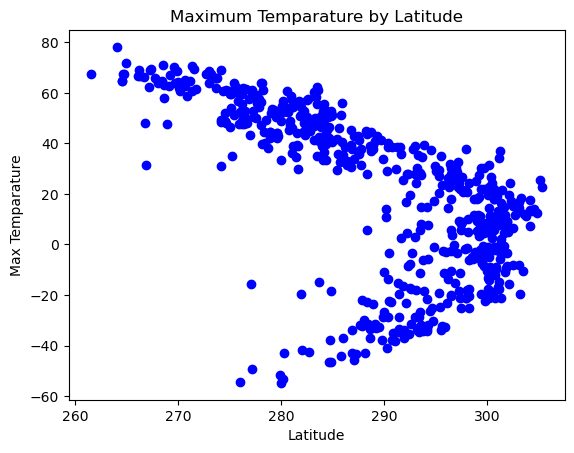

In [8]:
# Build scatter plot for latitude vs. temperature
y_axis_val = city_data_df["Lat"]
y_axis_val

x_axis_val = city_data_df["Max Temp"] 
x_axis_val

plt.scatter(x_axis_val,y_axis_val, color="blue")

# Incorporate the other graph properties
plt.title('Maximum Temparature by Latitude')
plt.ylabel('Max Temparature')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

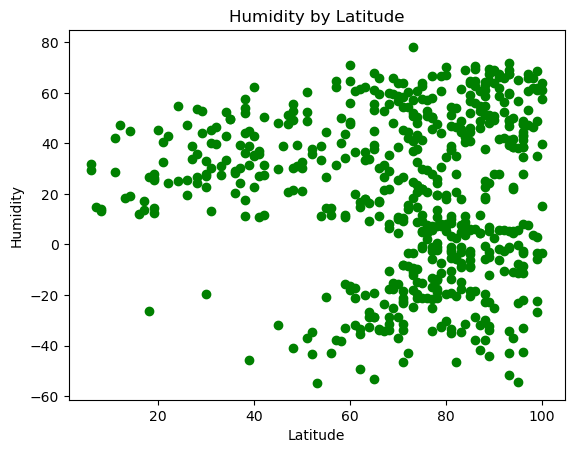

In [9]:
# Build the scatter plots for latitude vs. humidity
y_axis_val = city_data_df["Lat"]
y_axis_val

x_axis_val = city_data_df["Humidity"] 
x_axis_val

plt.scatter(x_axis_val,y_axis_val, color="green")

# Incorporate the other graph properties
plt.title('Humidity by Latitude')
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

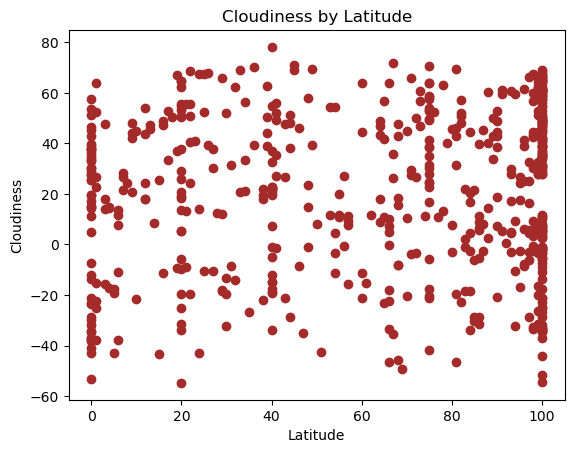

In [10]:
# Build the scatter plots for latitude vs. cloudiness
y_axis_val = city_data_df["Lat"]
y_axis_val

x_axis_val = city_data_df["Cloudiness"] 
x_axis_val

plt.scatter(x_axis_val,y_axis_val, color="brown")

# Incorporate the other graph properties
plt.title('Cloudiness by Latitude')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

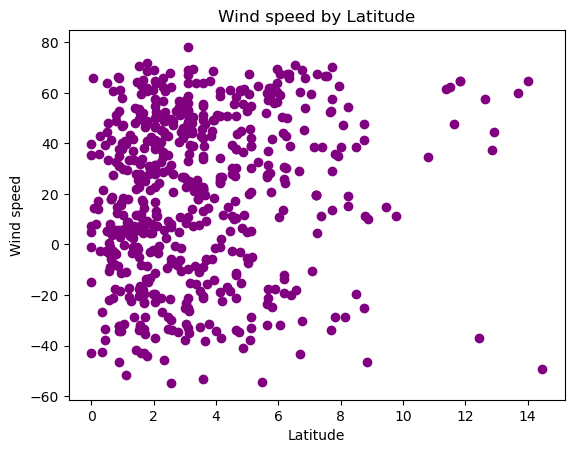

In [11]:
# Build the scatter plots for latitude vs. wind speed
y_axis_val = city_data_df["Lat"]
y_axis_val

x_axis_val = city_data_df["Wind Speed"] 
x_axis_val

plt.scatter(x_axis_val,y_axis_val, color="purple")

# Incorporate the other graph properties
plt.title('Wind speed by Latitude')
plt.ylabel('Wind speed')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

y_axis_val = city_data_df["Max Temp"]
x_axis_val = city_data_df["Lat"]

d_slope, d_intercept, d_rvalu, d_pvalue, d_std_err = st.linregress( x_axis_val, y_axis_val)

d_fit = (d_slope * x_axis_val )+ d_intercept

print(d_fit)

print(d_slope,d_intercept, d_rvalu,d_pvalue, d_std_err )

print(f"The correlation coefficient between Max Temp and lat is {round(st.pearsonr(x_axis_val,y_axis_val)[0],2)}")



City_ID
0      283.887673
1      284.840643
2      295.744119
3      284.970344
4      303.230129
          ...    
574    284.903018
575    281.482957
576    285.722685
577    293.807162
578    285.541539
Name: Lat, Length: 579, dtype: float64
-0.2012736202881603 293.2972753951767 -0.6184740390078106 2.1151765008091646e-62 0.010646145405148947
The correlation coefficient between Max Temp and lat is -0.62


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berdyansk,46.7503,36.7944,282.37,81,64,2.05,UA,1969-12-31 19:00:01.682292924-05:00
1,fuxin,42.0156,121.6589,284.61,11,9,2.93,CN,1969-12-31 19:00:01.682292924-05:00
3,bethel,41.3712,-73.4140,287.60,75,75,2.06,US,1969-12-31 19:00:01.682292926-05:00
6,athens,37.9795,23.7162,288.93,74,20,0.89,GR,1969-12-31 19:00:01.682292604-05:00
7,tanda,26.5500,82.6500,297.53,28,95,2.91,IN,1969-12-31 19:00:01.682292928-05:00


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,west island,-12.1568,96.8225,300.14,89,40,4.63,CC,1969-12-31 19:00:01.682292926-05:00
4,port-aux-francais,-49.3500,70.2167,277.22,62,69,14.46,TF,1969-12-31 19:00:01.682292926-05:00
5,mar del plata,-38.0023,-57.5575,289.79,88,6,0.45,AR,1969-12-31 19:00:01.682292753-05:00
10,margaret river,-33.9500,115.0667,286.92,66,84,7.68,AU,1969-12-31 19:00:01.682292930-05:00
12,ecoporanga,-18.3733,-40.8306,293.91,85,83,3.50,BR,1969-12-31 19:00:01.682292931-05:00


###  Temperature vs. Latitude Linear Regression Plot

City_ID
0      282.214579
1      284.614199
3      284.940791
6      286.659757
7      292.452406
          ...    
571    281.206371
574    284.771261
575    276.159400
576    286.835217
578    286.379083
Name: Lat, Length: 410, dtype: float64
-0.5068155914052326 305.9083598753759 -0.8968628752047455 1.2570593538473384e-146 0.012374262270150248
The correlation coefficient of Northern Hemisphere between Max Temp and lat is -0.9


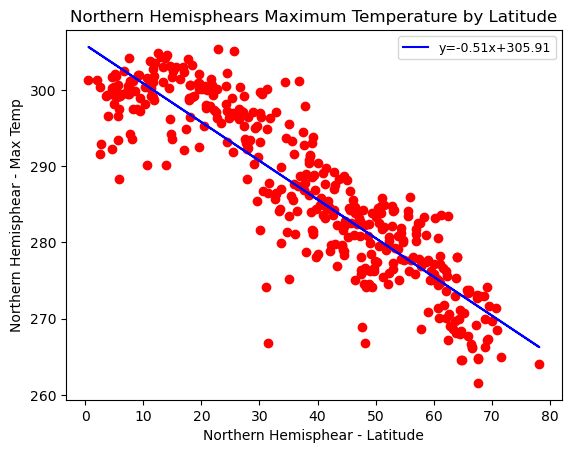

In [15]:
# Linear regression on Northern Hemisphere
y_axis_val = northern_hemi_df["Max Temp"]
x_axis_val = northern_hemi_df["Lat"]

nht_slope, nht_intercept, nht_rvalu, nht_pvalue, nht_std_err = st.linregress( x_axis_val, y_axis_val)

nht_fit = (nht_slope * x_axis_val )+ nht_intercept

print(nht_fit)

print(nht_slope,nht_intercept, nht_rvalu,nht_pvalue, nht_std_err )

print(f"The correlation coefficient of Northern Hemisphere between Max Temp and lat is {round(st.pearsonr(x_axis_val,y_axis_val)[0],2)}")
plt.scatter(x_axis_val,y_axis_val, color="red")

plt.plot(x_axis_val,nht_fit,'b', label='y={:.2f}x+{:.2f}'.format(nht_slope,nht_intercept))
plt.legend(fontsize=9)
plt.title('Northern Hemisphears Maximum Temperature by Latitude')
plt.ylabel('Northern Hemisphear - Max Temp')
plt.xlabel('Northern Hemisphear - Latitude')

plt.show()

City_ID
2      297.003830
4      285.218804
5      288.814433
10     290.098443
12     295.034072
          ...    
556    290.835808
559    299.243268
572    300.814544
573    298.971307
577    300.053130
Name: Lat, Length: 169, dtype: float64
0.31685970875975084 300.8558305518031 0.7237038042584547 1.065367230684117e-28 0.023381194800760632
The correlation coefficient of Southern Hemisphere between Max Temp and lat is 0.72


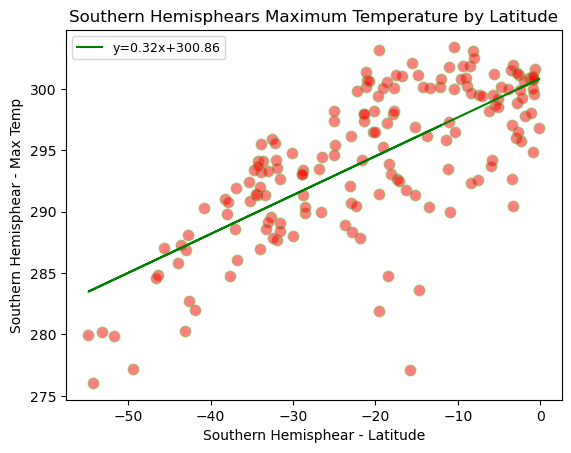

In [16]:
# Linear regression on Southern Hemisphere
y_axis_val = southern_hemi_df["Max Temp"]
x_axis_val = southern_hemi_df["Lat"]

sht_slope, sht_intercept, sht_rvalu, sht_pvalue, sht_std_err = st.linregress( x_axis_val, y_axis_val)

sht_fit = (sht_slope * x_axis_val )+ sht_intercept

print(sht_fit)

print(sht_slope,sht_intercept, sht_rvalu,sht_pvalue, sht_std_err )

print(f"The correlation coefficient of Southern Hemisphere between Max Temp and lat is {round(st.pearsonr(x_axis_val,y_axis_val)[0],2)}")
plt.scatter(x_axis_val,y_axis_val, color="red", s=60, alpha=0.5, edgecolors='#7eb54e'
           )

#plt.plot(x_axis_val,sht_fit,"--")

plt.plot(x_axis_val,sht_fit, 'g', label='y={:.2f}x+{:.2f}'.format(sht_slope,sht_intercept))
plt.legend(fontsize=9)


plt.title('Southern Hemisphears Maximum Temperature by Latitude')
plt.ylabel('Southern Hemisphear - Max Temp')
plt.xlabel('Southern Hemisphear - Latitude')

plt.show()

**Discussion about the linear relationship:** Nothern Hemisphere weather max temparature and latitude is negatively correlated. It is almost perfectly negatively correlated with a -.9 correlation.  Where as Southern Hemisphere Max temperature and latisude a positivly correlated. however there are a fair amount of elements are out liers thus a positve correlation of .072 

### Humidity vs. Latitude Linear Regression Plot

0.18480943989194373 60.916963504546885 0.15168270489466218 0.0020713794815141163 0.059621594672629424
The correlation coefficient in Northern Hemisphere, between Humidity and Latitude is 0.15


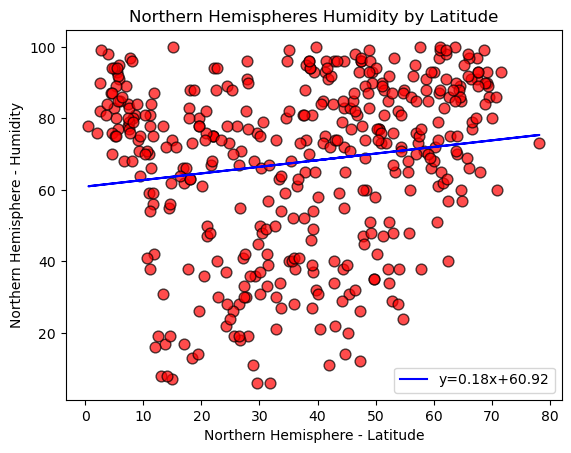

In [17]:
# Northern Hemisphere
y_axis_val = northern_hemi_df["Humidity"]
x_axis_val = northern_hemi_df["Lat"]

nhh_slope, nhh_intercept, nhh_rvalu, nhh_pvalue, nhh_std_err = st.linregress( x_axis_val, y_axis_val)

nhh_fit = (nhh_slope * x_axis_val )+ nhh_intercept

print(nhh_slope, nhh_intercept, nhh_rvalu, nhh_pvalue, nhh_std_err )

print(f"The correlation coefficient in Northern Hemisphere, between Humidity and Latitude is {round(st.pearsonr(x_axis_val,y_axis_val)[0],2)}")
plt.scatter(x_axis_val,y_axis_val, color="red", s=60, alpha=0.7, edgecolors="k")

plt.plot(x_axis_val, nhh_fit, 'b', label='y={:.2f}x+{:.2f}'.format(nhh_slope, nhh_intercept))
plt.legend(fontsize=10)

plt.title('Northern Hemispheres Humidity by Latitude')
plt.ylabel('Northern Hemisphere - Humidity')
plt.xlabel('Northern Hemisphere - Latitude')

plt.show()

0.31952913735904026 83.63637099757103 0.3227864773438431 1.8670906140294715e-05 0.07250109787468074
The correlation coefficient in Southern Hemisphere, between Humidity and Latitude is 0.32


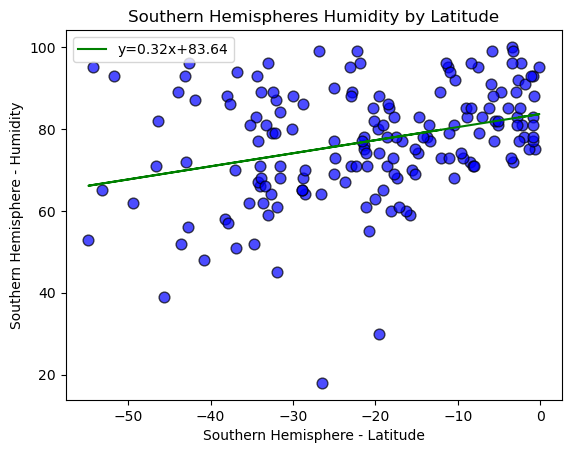

In [18]:
# Southern Hemisphere
y_axis_val = southern_hemi_df["Humidity"]
x_axis_val = southern_hemi_df["Lat"]

shh_slope, shh_intercept, shh_rvalu, shh_pvalue, shh_std_err = st.linregress( x_axis_val, y_axis_val)

shh_fit = (shh_slope * x_axis_val )+ shh_intercept

print(shh_slope,shh_intercept, shh_rvalu,shh_pvalue, shh_std_err )

print(f"The correlation coefficient in Southern Hemisphere, between Humidity and Latitude is {round(st.pearsonr(x_axis_val,y_axis_val)[0],2)}")
plt.scatter(x_axis_val,y_axis_val, color="blue", s=60, alpha=0.7, edgecolors="k")

plt.plot(x_axis_val,shh_fit, 'g', label='y={:.2f}x+{:.2f}'.format(shh_slope,shh_intercept))
plt.legend(fontsize=10)

plt.title('Southern Hemispheres Humidity by Latitude')
plt.ylabel('Southern Hemisphere - Humidity')
plt.xlabel('Southern Hemisphere - Latitude')

plt.show()

**Discussion about the linear relationship:** Humidity and Latitude have very little correlations wither for Northern or southern hemisphsere.  The Nothern hemisphere is only has .15 corelation and Southern hemisphere has slitghtly better correlation of .32.  However both have positive relation 

### Cloudiness vs. Latitude Linear Regression Plot

0.14954331639192553 57.71576183507889 0.0810374832245061 0.10130281978559715 0.09105845063666336
The correlation coefficient in Northern Hemisphere, between Cloudiness and Latitude is 0.08


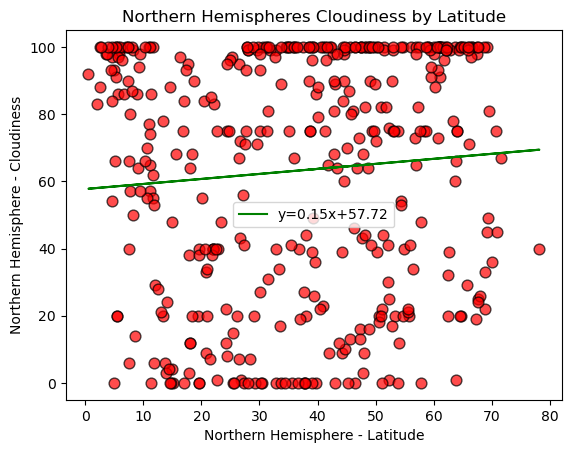

In [19]:
# Northern Hemisphere
y_axis_val = northern_hemi_df["Cloudiness"]
x_axis_val = northern_hemi_df["Lat"]

nhc_slope, nhc_intercept, nhc_rvalu, nhc_pvalue, nhc_std_err = st.linregress( x_axis_val, y_axis_val)

nhc_fit = (nhc_slope * x_axis_val )+ nhc_intercept

print(nhc_slope,nhc_intercept, nhc_rvalu,nhc_pvalue, nhc_std_err )

print(f"The correlation coefficient in Northern Hemisphere, between Cloudiness and Latitude is {round(st.pearsonr(x_axis_val,y_axis_val)[0],2)}")
plt.scatter(x_axis_val,y_axis_val, color="red", s=60, alpha=0.7, edgecolors="k")

plt.plot(x_axis_val,nhc_fit, 'g', label='y={:.2f}x+{:.2f}'.format(nhc_slope,nhc_intercept))
plt.legend(fontsize=10)

plt.title('Northern Hemispheres Cloudiness by Latitude')
plt.ylabel('Northern Hemisphere - Cloudiness')
plt.xlabel('Northern Hemisphere - Latitude')

plt.show()

0.4849960625010873 69.33619800419349 0.17937129669315607 0.019623037488979297 0.20583804955741936
The correlation coefficient in Southern Hemisphere, between Cloudinessy and Latitude is 0.18


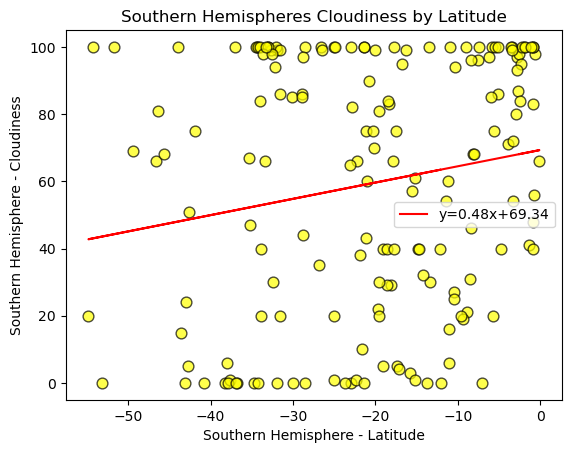

In [20]:
# Southern Hemisphere
y_axis_val = southern_hemi_df["Cloudiness"]
x_axis_val = southern_hemi_df["Lat"]

shc_slope, shc_intercept, shc_rvalu, shc_pvalue, shc_std_err = st.linregress( x_axis_val, y_axis_val)

shc_fit = (shc_slope * x_axis_val )+ shc_intercept

print(shc_slope,shc_intercept, shc_rvalu,shc_pvalue, shc_std_err )

print(f"The correlation coefficient in Southern Hemisphere, between Cloudinessy and Latitude is {round(st.pearsonr(x_axis_val,y_axis_val)[0],2)}")
plt.scatter(x_axis_val,y_axis_val, color="yellow", s=60, alpha=0.7, edgecolors="k")

plt.plot(x_axis_val,shc_fit, 'r', label='y={:.2f}x+{:.2f}'.format(shc_slope,shc_intercept))
plt.legend(fontsize=10)

plt.title('Southern Hemispheres Cloudiness by Latitude')
plt.ylabel('Southern Hemisphere - Cloudiness')
plt.xlabel('Southern Hemisphere - Latitude')

plt.show()

**Discussion about the linear relationship:** there is almost zeo correlations between cloudiness and Latitude. for bothe Nothern and Southern hemisphere. .08 and .18 are almost zero correlation.

### Wind Speed vs. Latitude Linear Regression Plot

0.029368931002906513 2.47459235684814 0.22373928698485027 4.769808022292014e-06 0.006333795870371138
The correlation coefficient in Northern Hemisphere, between Wind Speed and Latitude is 0.22


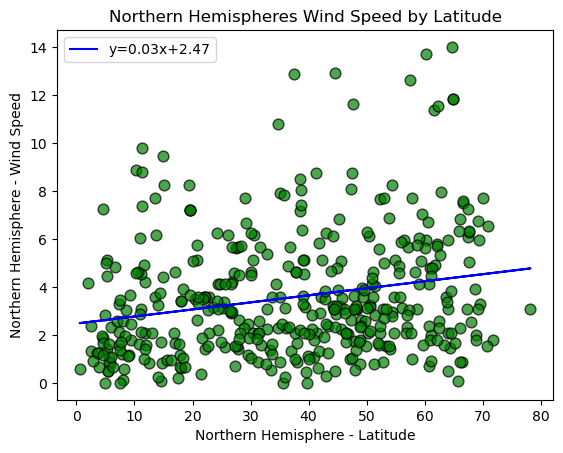

In [21]:
# Northern Hemisphere
y_axis_val = northern_hemi_df["Wind Speed"]
x_axis_val = northern_hemi_df["Lat"]

nhw_slope, nhw_intercept, nhw_rvalu, nhw_pvalue, nhw_std_err = st.linregress( x_axis_val, y_axis_val)

nhw_fit = (nhw_slope * x_axis_val )+ nhw_intercept

print(nhw_slope,nhw_intercept, nhw_rvalu,nhw_pvalue, nhw_std_err )

print(f"The correlation coefficient in Northern Hemisphere, between Wind Speed and Latitude is {round(st.pearsonr(x_axis_val,y_axis_val)[0],2)}")
plt.scatter(x_axis_val,y_axis_val, color="green", s=60, alpha=0.7, edgecolors="k")

plt.plot(x_axis_val,nhw_fit, 'b', label='y={:.2f}x+{:.2f}'.format(nhw_slope,nhw_intercept))
plt.legend(fontsize=10)

plt.title('Northern Hemispheres Wind Speed by Latitude')
plt.ylabel('Northern Hemisphere - Wind Speed')
plt.xlabel('Northern Hemisphere - Latitude')

plt.show()

-0.036995731544135 2.261661720200258 -0.22207607655987888 0.0037092120177054807 0.012569247924519128
The correlation coefficient in Southern Hemisphere, between Wind Speed and Latitude is -0.22


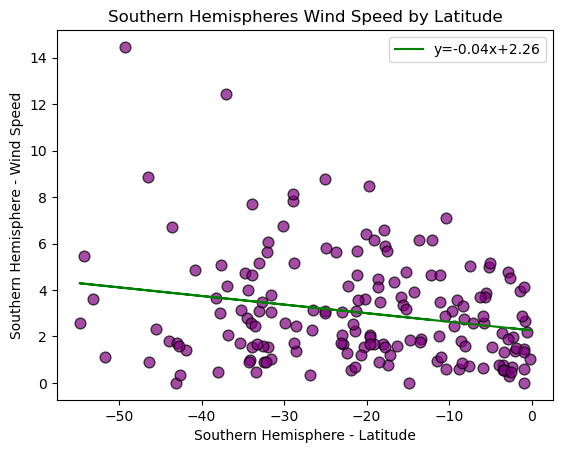

In [22]:
# Southern Hemisphere
y_axis_val = southern_hemi_df["Wind Speed"]
x_axis_val = southern_hemi_df["Lat"]

shw_slope, shw_intercept, shw_rvalu, shw_pvalue, shw_std_err = st.linregress( x_axis_val, y_axis_val)

shw_fit = (shw_slope * x_axis_val )+ shw_intercept

print(shw_slope,shw_intercept, shw_rvalu,shw_pvalue, shw_std_err )

print(f"The correlation coefficient in Southern Hemisphere, between Wind Speed and Latitude is {round(st.pearsonr(x_axis_val,y_axis_val)[0],2)}")
plt.scatter(x_axis_val,y_axis_val, color="purple", s=60, alpha=0.7, edgecolors="k")

plt.plot(x_axis_val,shw_fit, 'g', label='y={:.2f}x+{:.2f}'.format(shw_slope,shw_intercept))
plt.legend(fontsize=10)

plt.title('Southern Hemispheres Wind Speed by Latitude')
plt.ylabel('Southern Hemisphere - Wind Speed')
plt.xlabel('Southern Hemisphere - Latitude')

plt.show()

**Discussion about the linear relationship:** Nothern and Southern hemisphere have very limited correlation. Southern has a negative trend of -.22 and Nothern has positive trend of .22